In [1]:
import tweepy
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
from pprint import pprint
import matplotlib.patches as mpatches











In [2]:
# setting targets
target_users = ("@BBCWorld", "@CBS", "@CNN", "@FoxNews","@nytimes")
color = ["blue","green","yellow","purple","red"]
now = datetime.datetime.now()
now2 = now.strftime("%m/%d/%y")
sentiment_list = []
text_list = []

#creating a loop to go through targets
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_text = []
target_list = []
tweet_time =[]

In [3]:
for target,colors in zip(target_users,color) :
    
    tweet_count = 1
    
   
    #creating loop to go through pages of tweets, there are 20 tweets per page and we loop through 5
    for x in range(1,6) :
        public_tweets = api.user_timeline(target,page = x)
        
        
        # looping through each tweet's text and analyzing them
        for tweet in public_tweets :
            results = analyzer.polarity_scores(tweet['text'])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            text= tweet['text']
            date= tweet['created_at']
            #appending list
            compound_list.append(compound)            
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweet_text.append(text)
            target_list.append(target)
            tweet_time.append(date)

            tweet_count = tweet_count + 1
           
        #appending my list for scatter plots
            sentiment_text = {
            "User": target_list,
            "Compound": compound_list,
            "Positive": positive_list,
            "Neutral": negative_list,
            "Negative": neutral_list,
            "Text":tweet_text,
            "Date Time":tweet_time
            }
        
            # appending list for bar plots- this is also unnessary and i could just use the dfs i use later
    sentiment = {
    "User": target,
    "Compound": np.mean(compound_list),
    "Positive": np.mean(positive_list),
    "Neutral": np.mean(negative_list),
    "Negative": np.mean(neutral_list)
        
    }
    sentiment_list.append(sentiment)

    test_df= pd.DataFrame(sentiment_text)
test_df.to_csv("analysis/News_tweet_sentiment_data", encoding="utf-8")      


In [4]:
#creating dfs for each twitter handle and adding a tweet counter
initial_value = 1
bbc_df = test_df[test_df['User'] == "@BBCWorld"]
cbs_df = test_df[test_df['User'] == "@CBS"]
cnn_df = test_df[test_df['User'] == "@CNN"]
fox_df = test_df[test_df['User'] == "@FoxNews"]
ny_df = test_df[test_df['User'] == "@nytimes"]
ny_df['counter'] = range(initial_value, len(ny_df) +initial_value)
fox_df['counter'] = range(initial_value, len(fox_df) +initial_value)
cnn_df['counter'] = range(initial_value, len(cnn_df) +initial_value)
cbs_df['counter'] = range(initial_value, len(cbs_df) +initial_value)
bbc_df['counter'] = range(initial_value, len(bbc_df) +initial_value)
test_df.head()
ny_df.head()

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,User,Compound,Positive,Neutral,Negative,Text,Date Time,counter
400,@nytimes,0.0000,0.000,0.000,1.000,"The wild, ragged days of Governors Island are ...",Sun Sep 30 04:17:52 +0000 2018,1
401,@nytimes,0.0000,0.000,0.000,1.000,"""Mind-blowing"" 3-D maps of ancient Maya struct...",Sun Sep 30 04:00:19 +0000 2018,2
402,@nytimes,0.2960,0.104,0.000,0.896,Robin Williams was an avid collector of art an...,Sun Sep 30 03:41:12 +0000 2018,3
403,@nytimes,-0.2732,0.149,0.254,0.597,"On Baseball: For David Wright, the Mets’ No. 5...",Sun Sep 30 03:23:16 +0000 2018,4
404,@nytimes,0.0000,0.000,0.000,1.000,"""When you are a new mother, there are two thin...",Sun Sep 30 03:17:15 +0000 2018,5


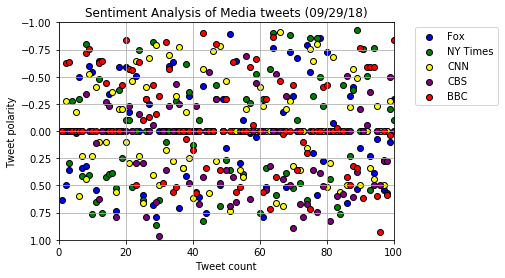

In [5]:
#plotting  my sentiments for each news outlet
plt.scatter(y=fox_df['Compound'],x=fox_df['counter'],c="blue",label='Fox',edgecolor="black",marker="o")
plt.scatter(y=ny_df['Compound'],x=ny_df['counter'],c="green",label='NY Times',edgecolor="black",marker="o")
plt.scatter(y=cnn_df['Compound'],x=cnn_df['counter'],c="yellow",label='CNN',edgecolor="black",marker="o")
plt.scatter(y=cbs_df['Compound'],x=cbs_df['counter'],c="purple",label='CBS',edgecolor="black",marker="o")
plt.scatter(y=bbc_df['Compound'],x=bbc_df['counter'],c="red",label='BBC',edgecolor="black",marker="o")
#making the graph look a bit better
plt.title(f"Sentiment Analysis of Media tweets ({now2})")
plt.xlabel("Tweet count")
plt.ylabel("Tweet polarity")
plt.ylim(-1, 1)
plt.xlim(0, 100)
plt.grid(True)
plt.margins(0,0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("analysis/Fig1.png")

In [6]:
news_df = pd.DataFrame(sentiment_list)#.round(2)
print(bbc_df['Compound'].mean())
news_df.head()

-0.083825


,Compound,Negative,Neutral,Positive,User
0,-0.083825,0.801240,0.128950,0.069830,@BBCWorld
1,0.028944,0.839115,0.081250,0.079640,@CBS
2,0.013616,0.846697,0.077060,0.076243,@CNN
3,0.007282,0.840220,0.081030,0.078755,@FoxNews
4,0.007568,0.839532,0.080786,0.079686,@nytimes


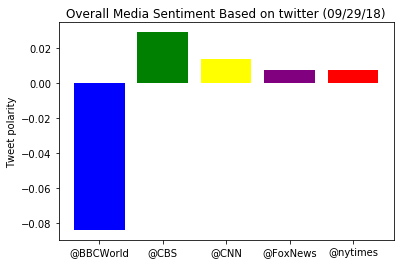

In [7]:
plt.bar(x= news_df["User"],height= news_df["Compound"],color=("blue","green","yellow","purple","red"))
plt.title(f"Overall Media Sentiment Based on twitter ({now2})")
plt.ylabel("Tweet polarity")
plt.savefig("analysis/Fig2.png")

- BBC world news is a lot more polarizing then the other news twitters
- most of the news twitters have neutral average sentiment
- CBS had overall the least negative sentiment in their tweets